# Vehicle Deteciton Project
Stephen Giardinelli

A quick note on the code in my notebooks.  The majority of the code in these notebooks was taken from or has been slightly adapted from the code provide in the Udacity lessons.

## Data Exploration
The data consisted of both car and noncar images that were 64x64x3 in dimentsion.  In order to augment the data, the images were flipped horizontally in order to provide a more robust data set.  Some of ranom selections of the data can be seen in the figure below.
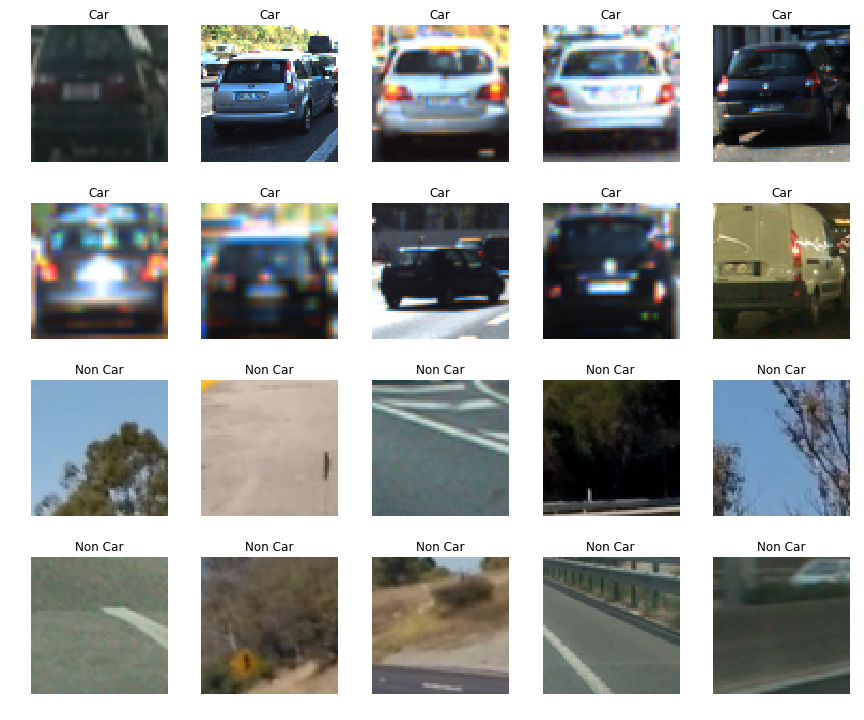

## Feature Extraction
### Spatial Features
In order to find the most relevant spatial features, I trained a classifier and tested it's accuracy for different combinations of colorspace and spatial size.  As you can see in the figure below, the best performing combination was a 16x16 spatial featureset taken from an image in the LAB colorspace.
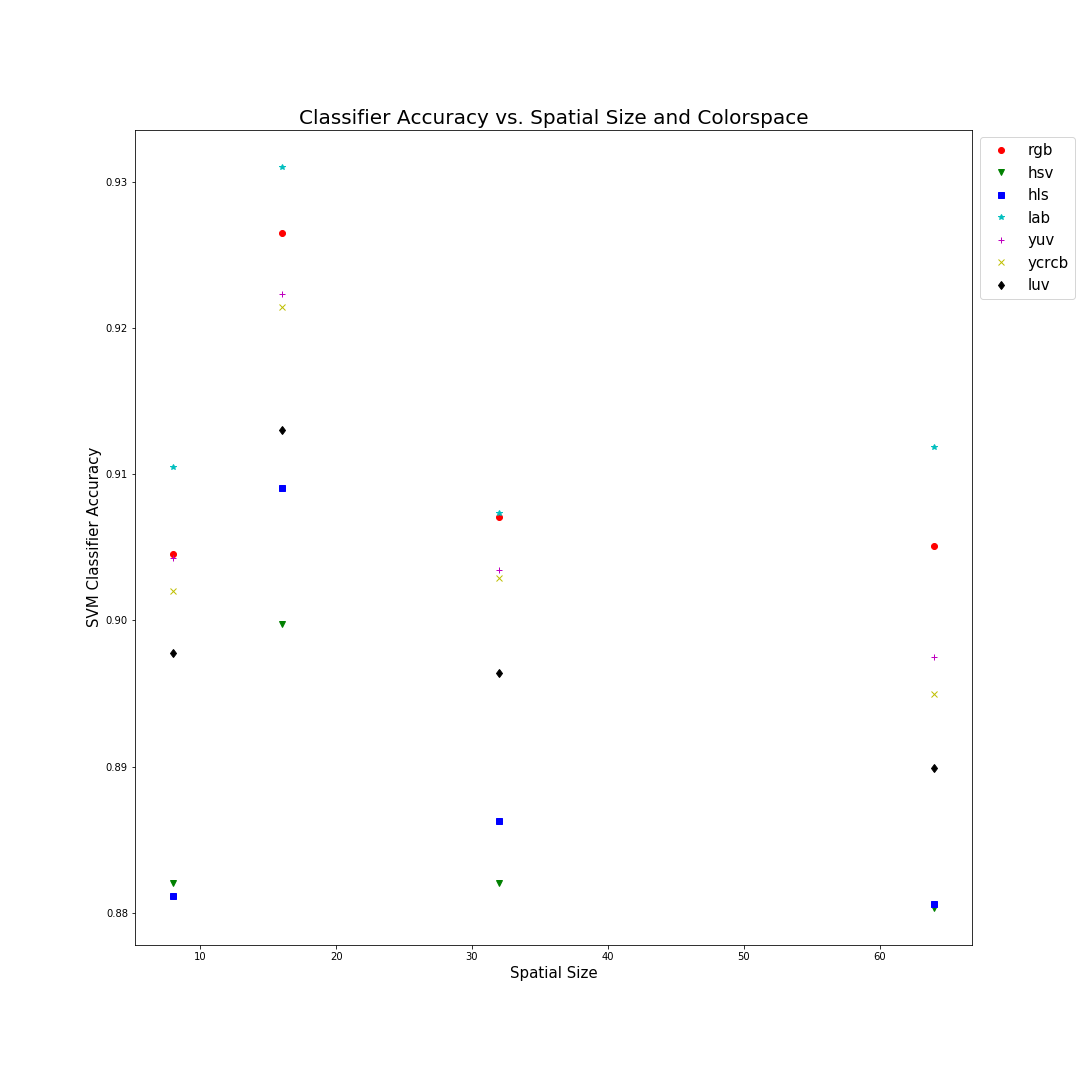
### Color Histogram
When exploring the color histograms I applied the same method of combining different colorspaces with a different amount of bins for the histogram.  To visualize what the color histograms look like for a few randomly slected images and colorspaces, view the figure below.
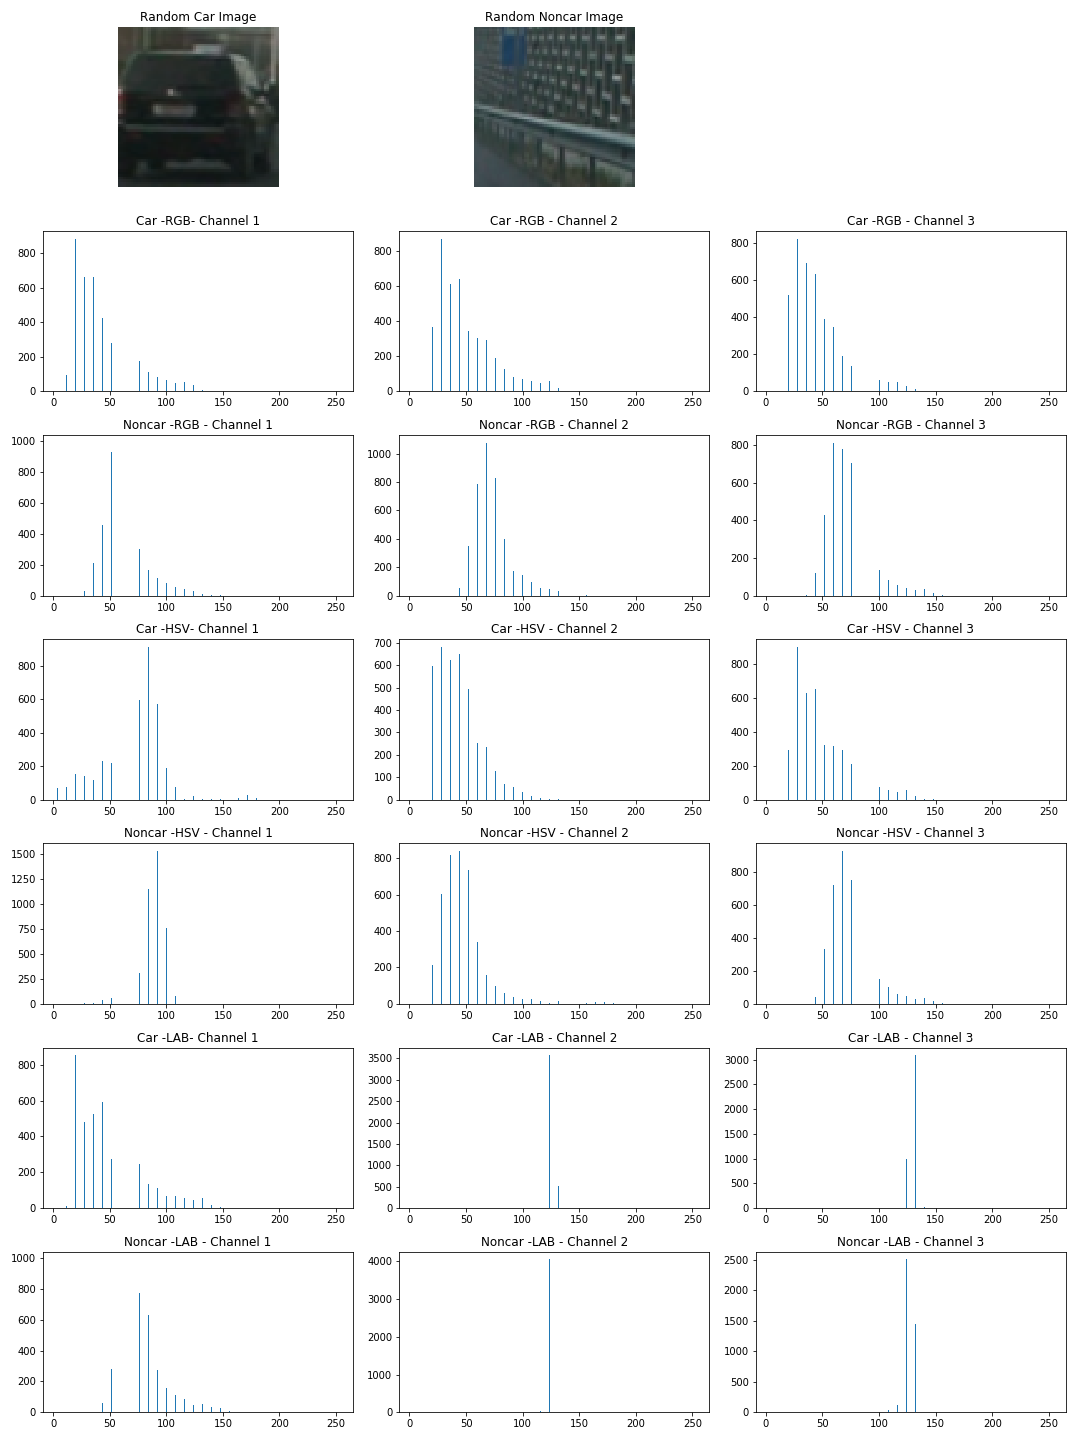
In order to choose the best combination of colorspace and amount of histogram bins, I trained a classifier on each combination, evaluated its accuracy and plotted the values on the figure below.  The best combination was the HSV colorspace with 44 bins.
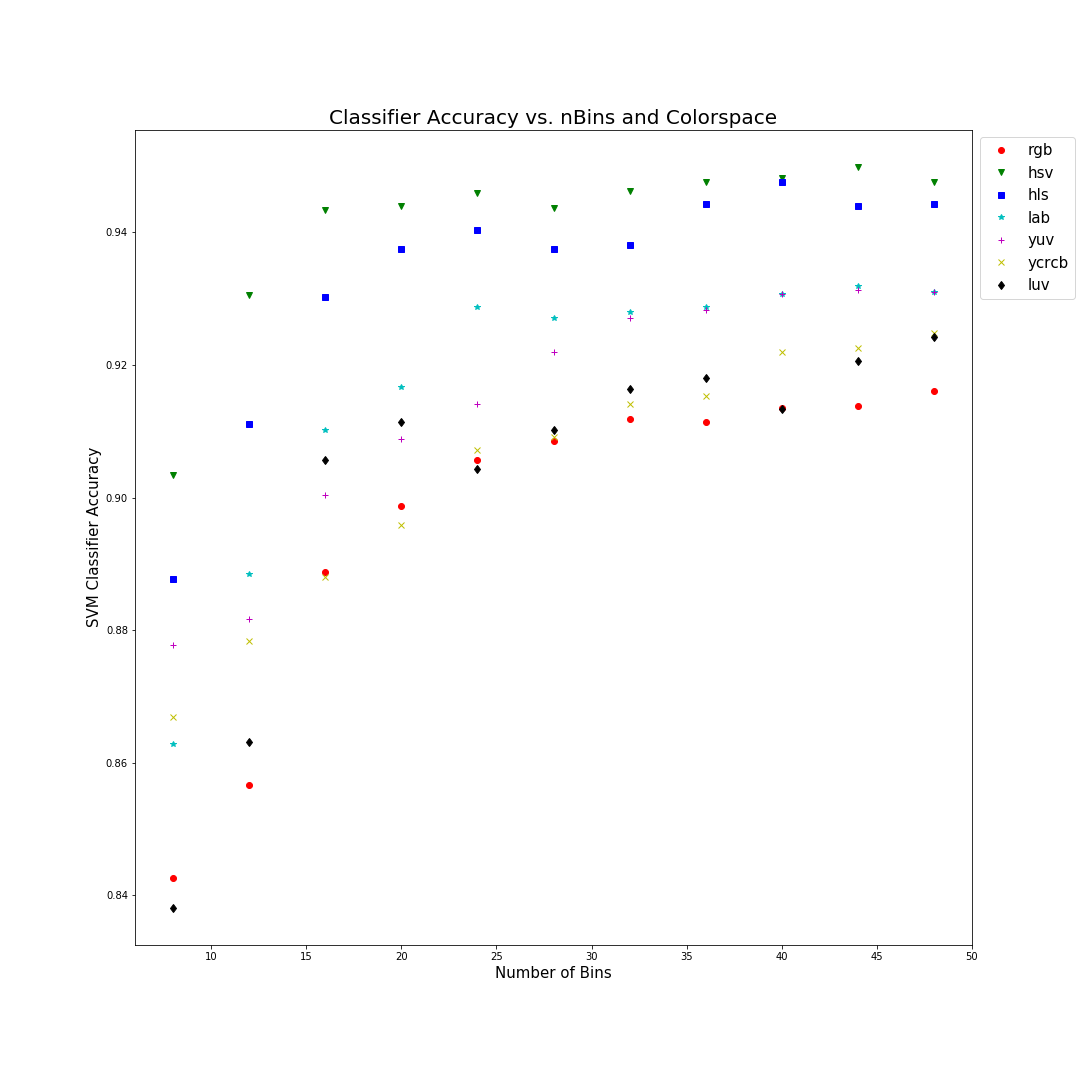
### Histogram of Gradients (HOG)
I performed the same task of visualizing the HOG features for random car and noncar images.  The results can be seen in the figure below.
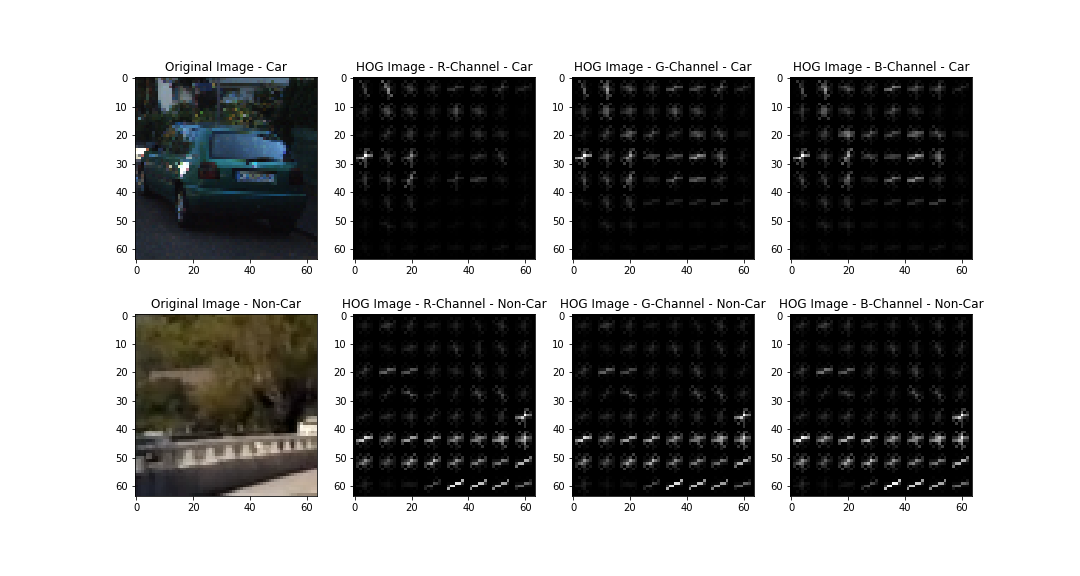
I also ran multiple tests for combinations of Colorspace and amount of channels. When considering channels, using all three channels combined yielded better accuracy than any single channel.  In terms of colorspace, they all yielded comparable accuracy with the exception of the RGB colorspace - LAB, YUV, and LUV were the top three, in that order, but only by a small margin.
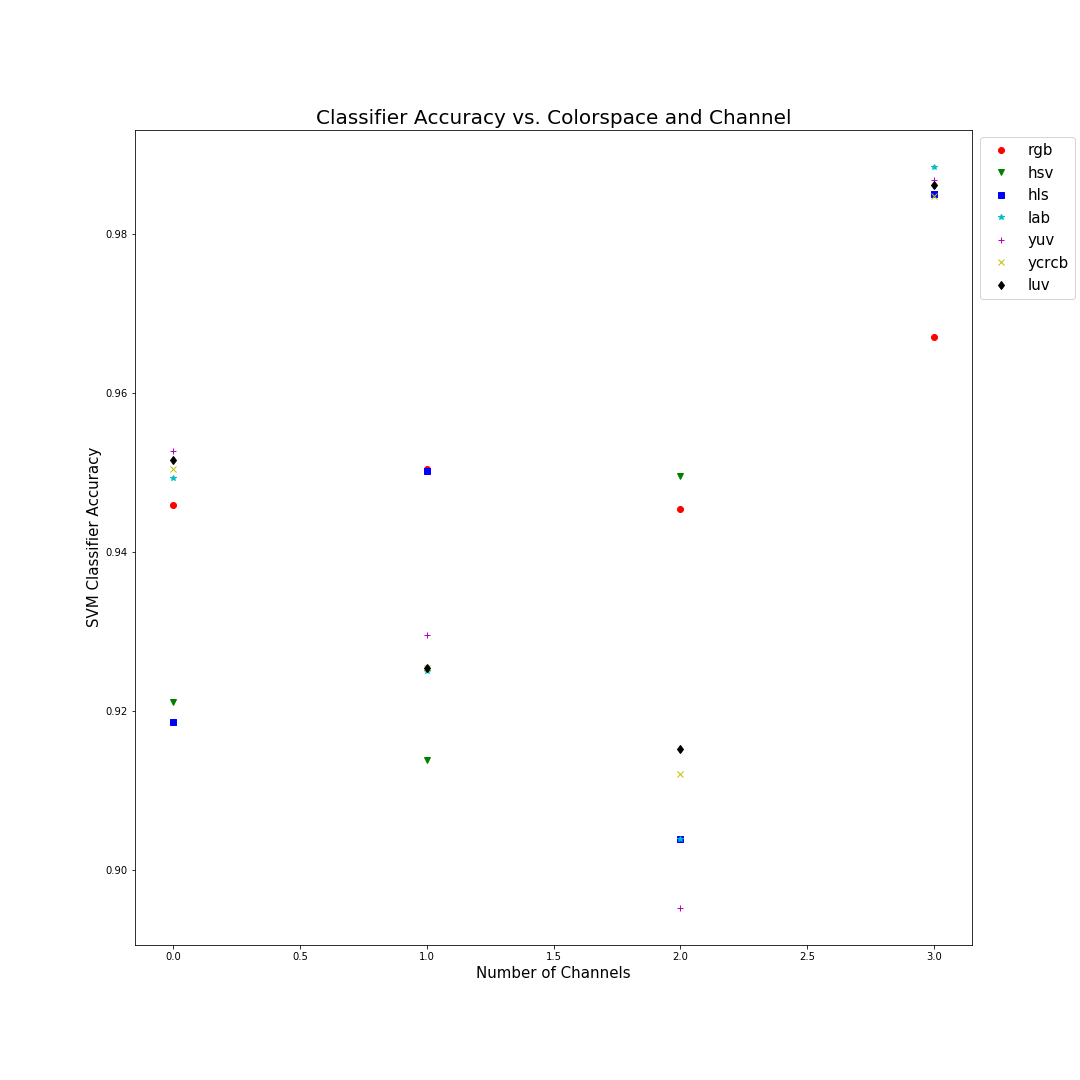
I also performed a test on different combinations of pixles per cell, cells per block, and orientaion bins.  I tested the following values:
    - Cells Per Block = [1,2] (I attempted 4, as well but I ran out of memory crashed the process)
    - Pixels Per Cell = [4,8,16]
    - Orientation Bins = [7, 9, 11, 13, 15, 17]
I tested all of these on the LAB and YUV colorspace's but for the sake of brevity, I will only show the plots for YUV.  I ended up choosing YUV in the end because it proved to show less false positives when run on the video.  Also, even though orient = 17 provided better accuracy on this test, when applied to the video orient=9 yielded better results with fewer false positives.
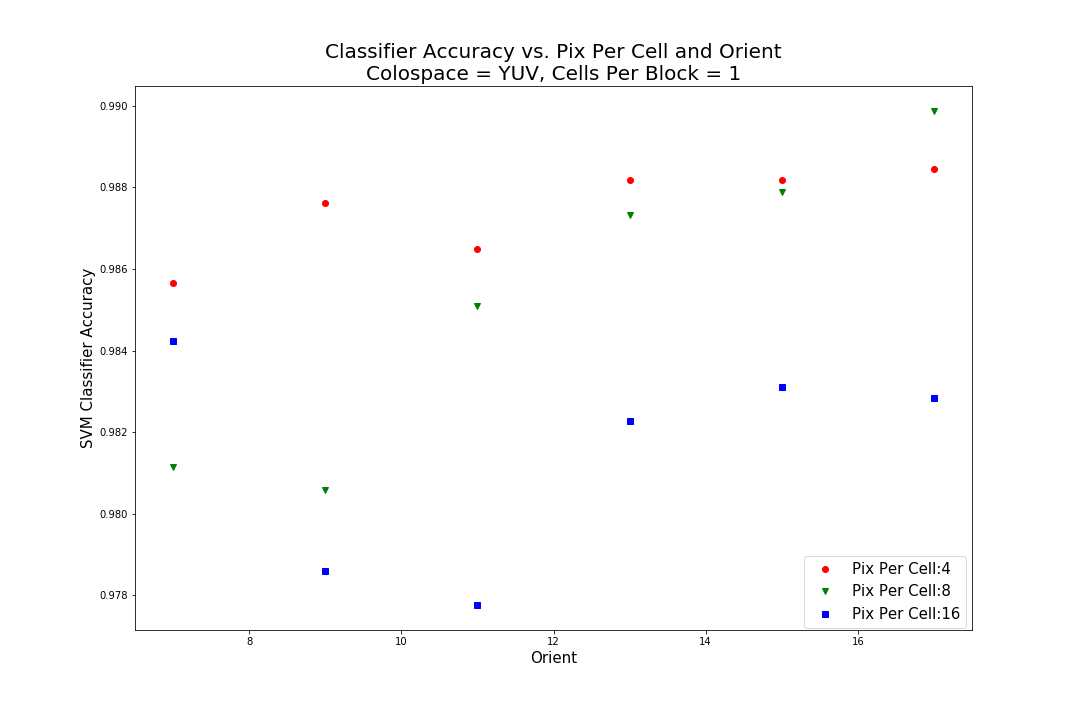
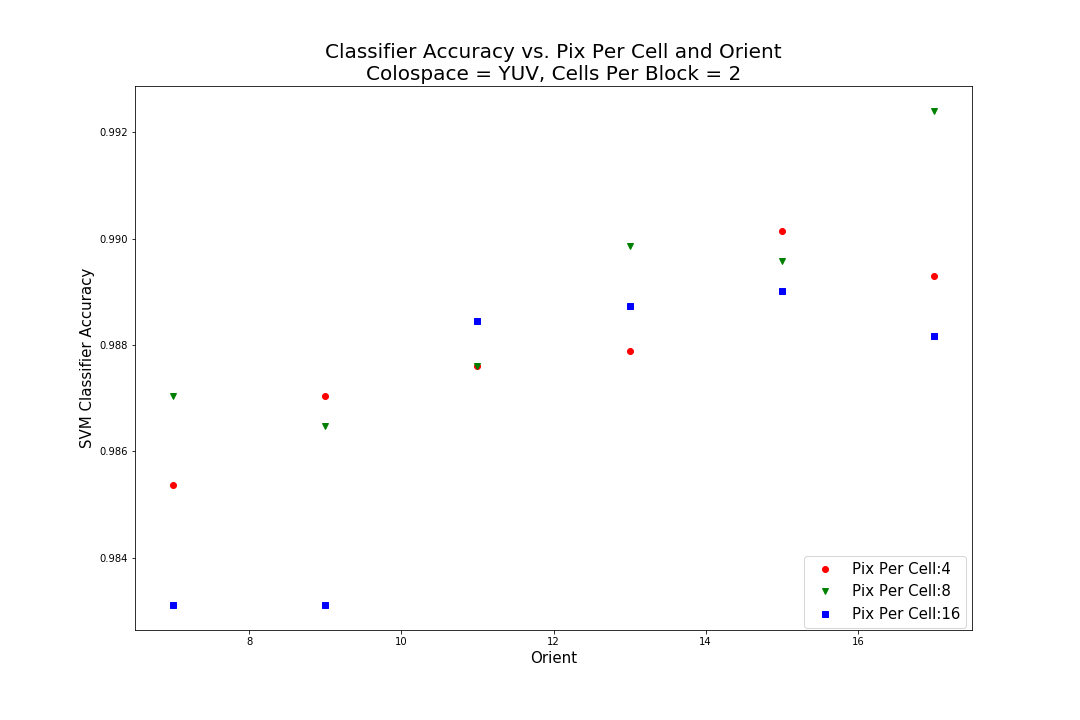
Based on all of the aformentioned analysis, I arrived at a final feature extraction set of:
    - Spatial Features
        - Colorspace: LAB
        - Spatial Size: (16x16)
    - Color Histogram:
        - Colorspace: HSV
        - Number of Bins: 44
        - Histogram Range: [0,255]
    - HOG
        - Colorspace: YUV
        - Orient: 9
        - Pixels Per Cell: 8
        - Cells Per Block: 2
 
## Training A Classifier
In order to train a classifier, I used the above feature extraction parameters.  I trained a LinearSVM and the StandardScaler to normalize the data.  The classifier was trained on all of the car and noncar image from the project repo and I peformed a horizontal flip on all images to augment the dataset and double the amount of training data.  My final accuracy score on the validation portion of the data was: 0.9945

## Sliding Window Search
In order to create the right crops for image vehicle detection, I had to experiment a lot with the acutal video file and test images.  The final implementation that I used can be seen in the following figure.
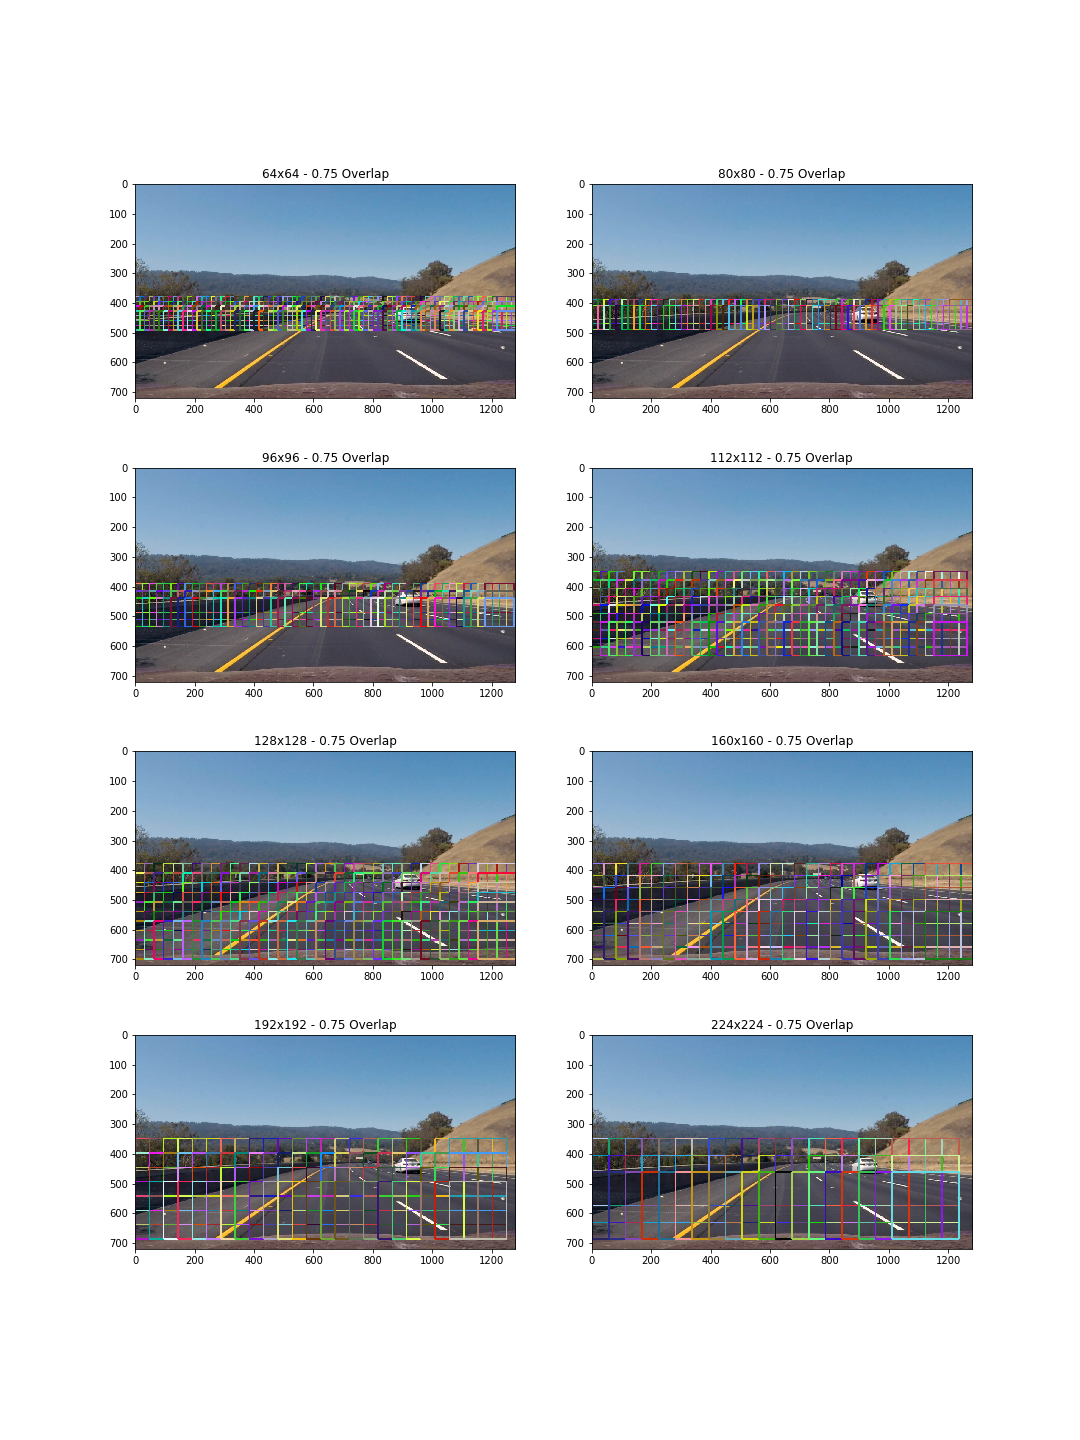

### Improving the Classifier
In order to make a more robust vehicle detection system, I needed to filter out the false positives while still maintaining the true positives.  In order to do this I used a heatmap and threshold.  For each bounding box, every pixel within the bounds would have it's "heat" increased by one.  So we are hoping for multiple detections on each vehicle and few or single detection on fals positives.  In order to transition this to video, I included "memory from frame to frame.  For each new frame, the detections from the past 10 frames would be added to the heat map.  This helps track the cars through the image and also make the system more robust to "dropped frames" where there are no detections on a vehicle.  A visualization of this process can be seen in the following figure.
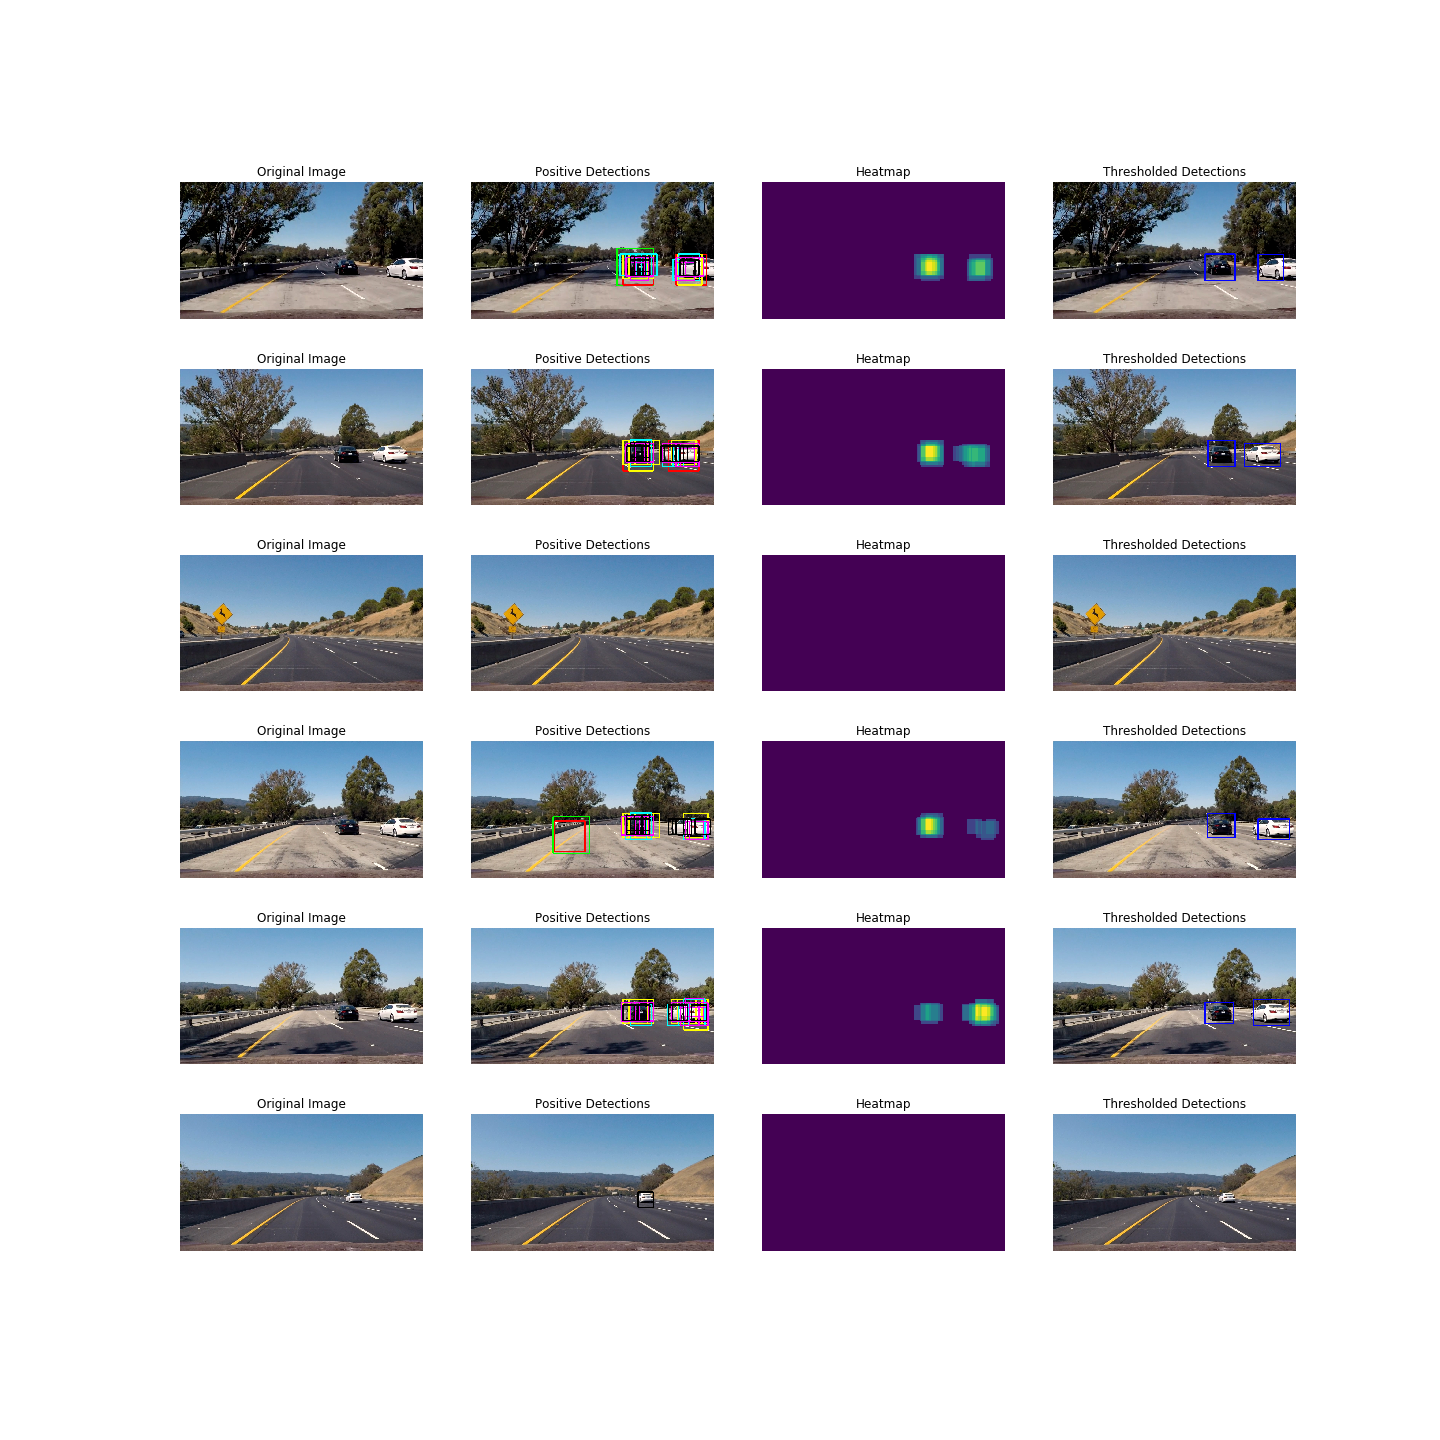
As you can see, in the last image, we have a single detection on the white car, but it is discarded because it does not meet the threshold.  This is where the frame to frame "memory" comes into play.  In the video, if we have a situation like this, the detections from the previous 10 frames should carry over to maintain the bounding box.

## Applying the Pipeline to Video
In order to apply this pipeline to the video, I created a new fuction and a VehicleDection class that stores the detections for the previous 10 frames.  The threhold value is set 10 an inital vale of 2, and increases by 2 for every frame that is "remembered" in the vehicle detection class.  The final video output can be seen here.

[Final Project Video](video_output/project_final.mp4)

## Discussion
Wile working through this project I ran into a lot of issues with classifier accuracy in regard to fals positives.  I first tried the LAB colorspace for the HOG features, but after switching to YUV I noticed a lot fewer false positives.  I also realized (a bit too late) that I was using far too many windows in my sliding window search application.  I had to set a very high threshold for the heatmap in order to filter out a all of the flase positives.  If I were to continue this project I would implement some hard negative mining on the false positives with the hopes of re-training the classifier.  Overall I found this to be a very interesting implementation, but the speed is clearly not viable for a real-time application.  I am also very interested in seeing how a deep learning detector like SSD or YOLO would compare to this approach.  I would imagine the deep learning approach would be superior in almost every way - but it would be an interesting benchmark.  The one major downfall that I noticed with this implementation was the inability to distinguish between two cars that were close or overlapping.  This is obviously due to the heatmap implementation, but I still think this would be a difficult problem to solve.